In [1]:
#RF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('features_87.csv')


In [3]:
data.shape


(11430, 89)

In [4]:
data.describe()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [5]:
pd.set_option('display.max_rows', 500)
data.isna().sum()

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s

In [6]:
pd.reset_option('display.max_rows')

original_dataset = data.copy()

class_map = {'legitimate':0, 'phishing':1}
original_dataset['status'] = original_dataset['status'].map(class_map)


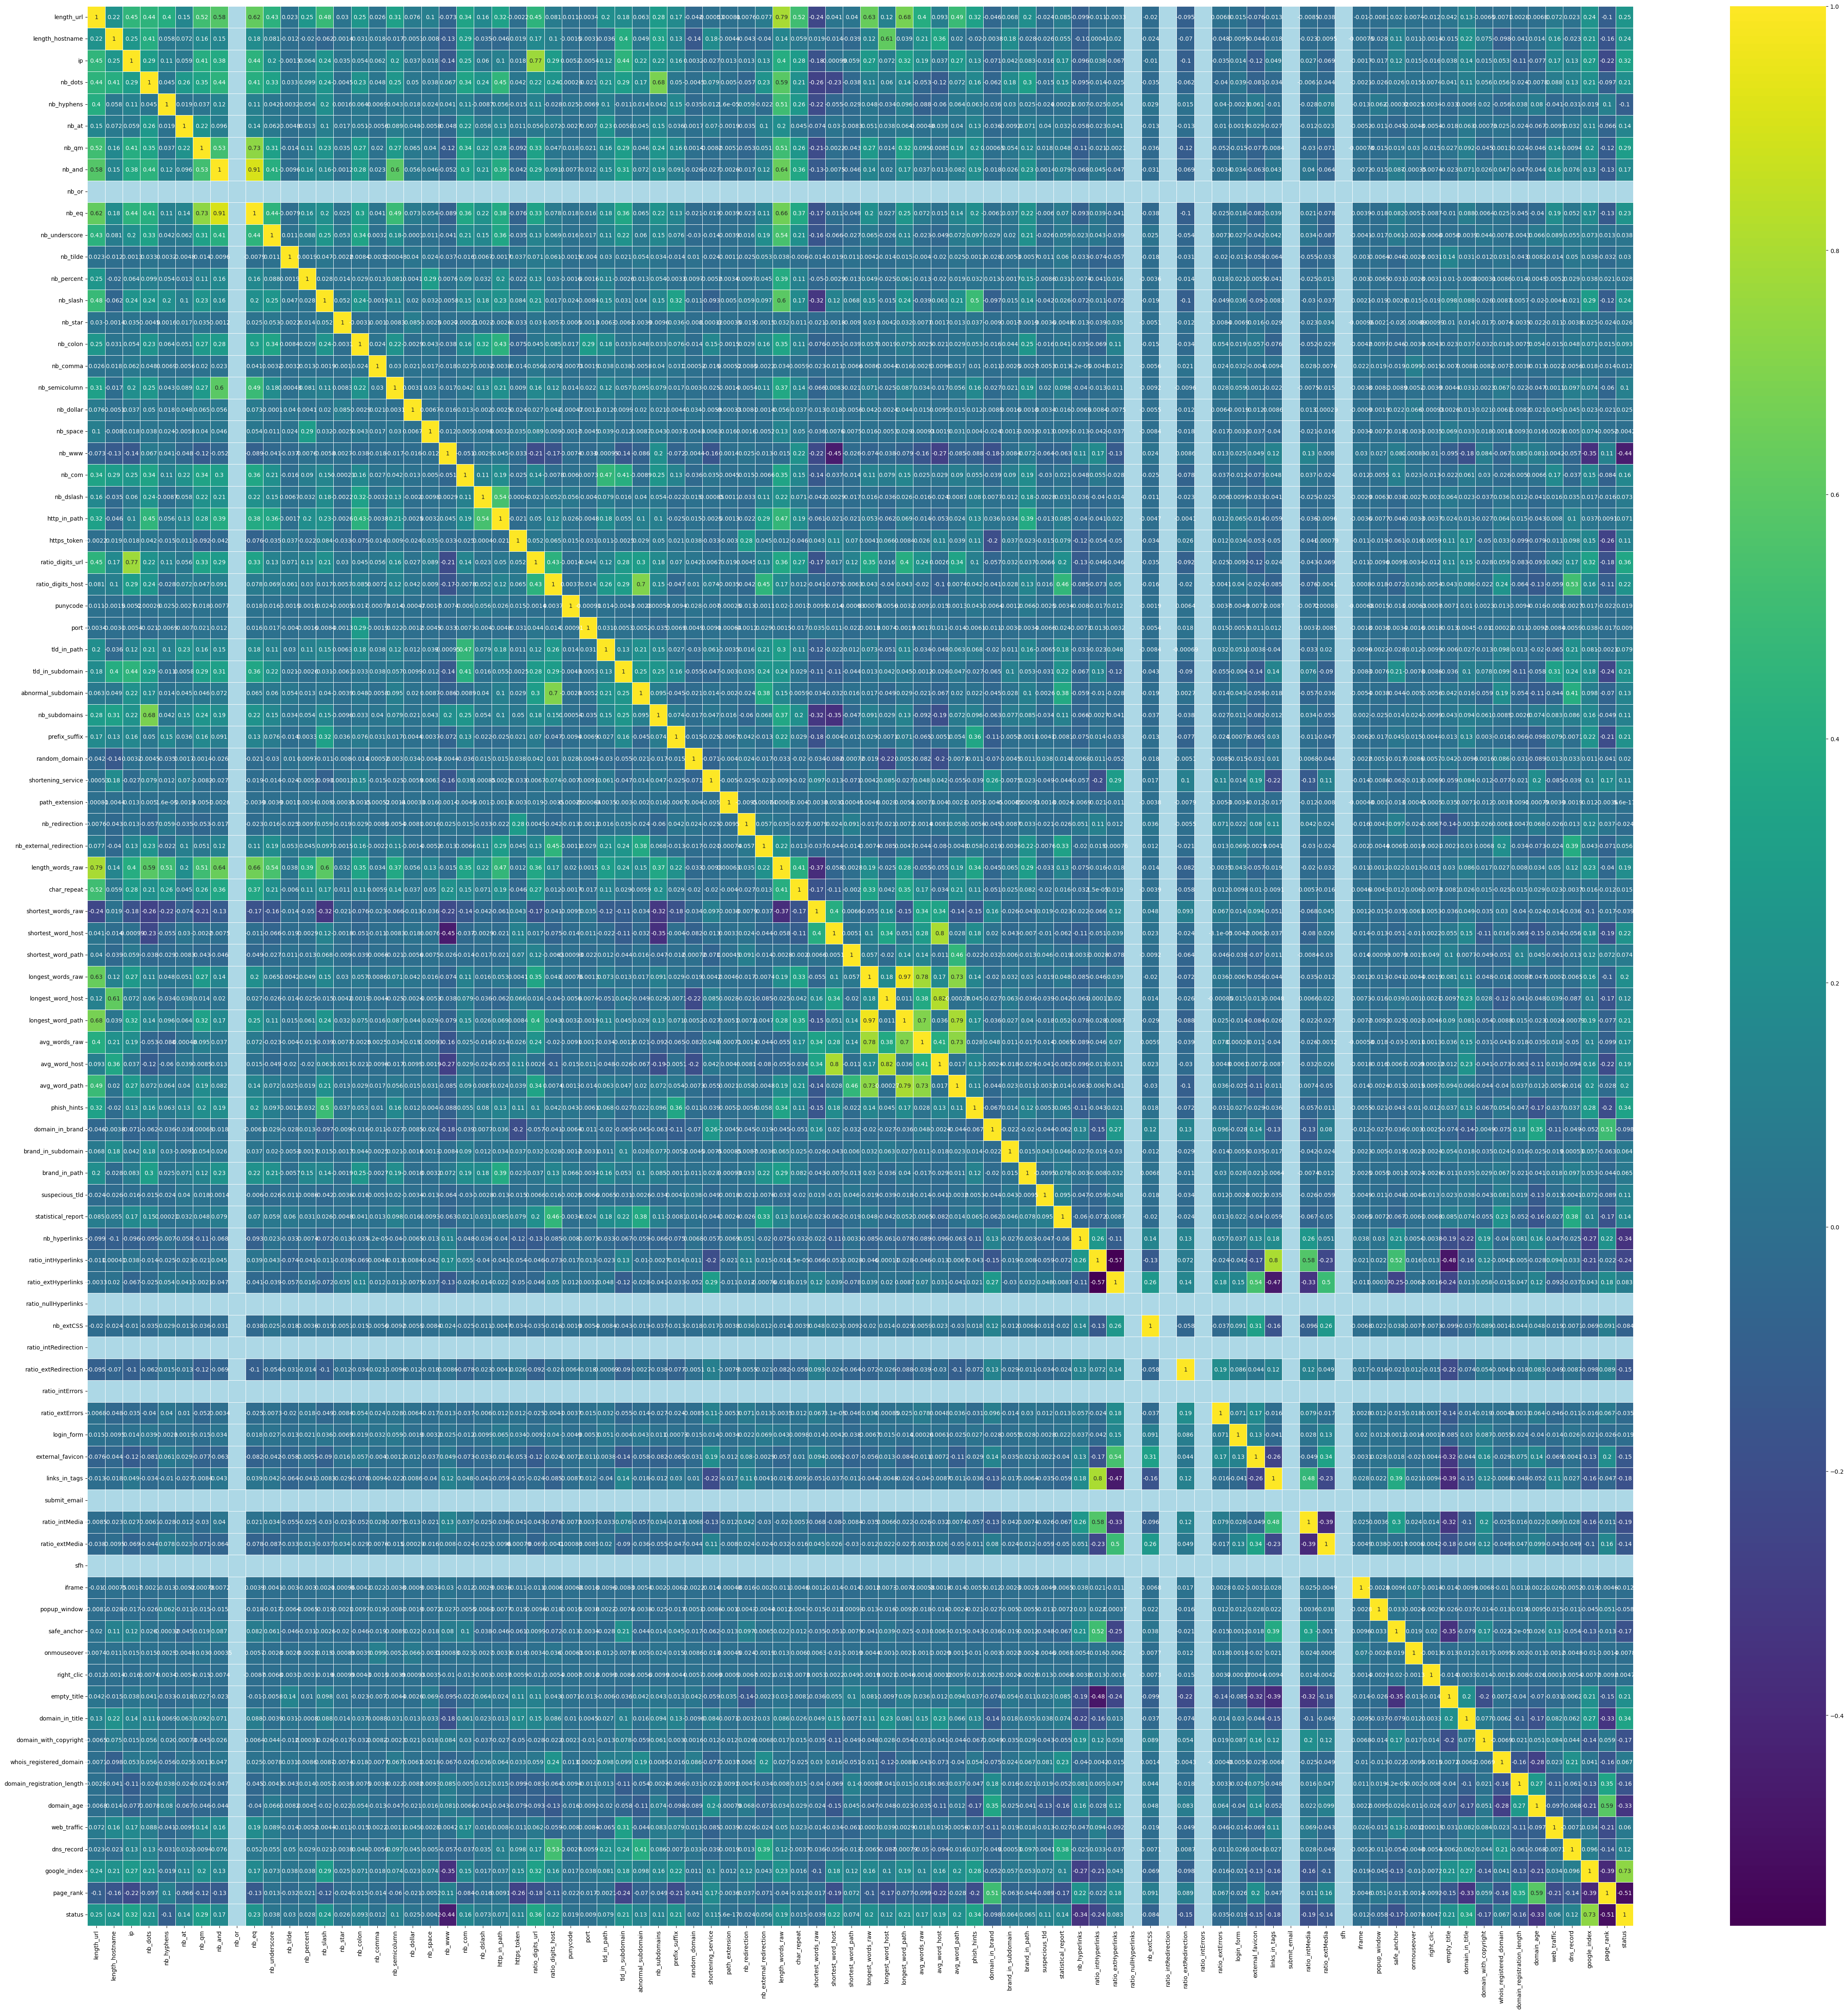

In [7]:
corr_matrix = original_dataset.corr()

plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()


In [9]:
corr_matrix.shape

(88, 88)

In [10]:
corr_matrix['status']

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [11]:
status_corr = corr_matrix['status']


In [12]:
status_corr.shape


(88,)

In [13]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [14]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected


[('length_url', ['0.248580']),
 ('length_hostname', ['0.238322']),
 ('ip', ['0.321698']),
 ('nb_dots', ['0.207029']),
 ('nb_qm', ['0.294319']),
 ('nb_eq', ['0.233386']),
 ('nb_slash', ['0.242270']),
 ('nb_www', ['-0.443468']),
 ('ratio_digits_url', ['0.356395']),
 ('ratio_digits_host', ['0.224335']),
 ('tld_in_subdomain', ['0.208884']),
 ('prefix_suffix', ['0.214681']),
 ('shortest_word_host', ['0.223084']),
 ('longest_words_raw', ['0.200147']),
 ('longest_word_path', ['0.212709']),
 ('phish_hints', ['0.335393']),
 ('nb_hyperlinks', ['-0.342628']),
 ('ratio_intHyperlinks', ['-0.243982']),
 ('empty_title', ['0.207043']),
 ('domain_in_title', ['0.342807']),
 ('domain_age', ['-0.331889']),
 ('google_index', ['0.731171']),
 ('page_rank', ['-0.511137']),
 ('status', ['1.000000'])]

In [15]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features


['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [16]:
X_selected = original_dataset[selected_features]
X_selected


,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_words_raw,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank
0,37,19,0,3,0,0,3,1,0.000000,0.000000,...,11,6,0,17,0.529412,0,0,-1,1,4
1,77,23,1,1,0,0,5,0,0.220779,0.000000,...,32,32,0,30,0.966667,0,1,5767,1,2
2,126,50,1,4,1,3,5,0,0.150794,0.000000,...,17,17,0,4,1.000000,0,1,4004,1,0
3,18,11,0,2,0,0,2,0,0.000000,0.000000,...,5,0,0,149,0.973154,0,1,-1,0,3
4,55,15,0,2,0,0,5,1,0.000000,0.000000,...,11,11,0,102,0.470588,0,0,8175,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,4,1,0.000000,0.000000,...,11,11,0,199,0.884422,0,0,5396,0,6
11426,84,18,0,5,1,1,5,1,0.023810,0.000000,...,10,8,0,3,1.000000,0,1,6728,1,0
11427,105,16,1,2,1,1,5,1,0.142857,0.000000,...,15,15,0,68,0.470588,0,0,8515,1,10
11428,38,30,0,2,0,0,3,1,0.000000,0.000000,...,22,0,0,32,0.375000,0,1,2836,0,4


In [17]:
y = original_dataset['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)
													
													
												


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                             )
											 
											 

In [22]:
model_random_forest.fit(X_train,y_train)


RandomForestClassifier(n_estimators=350, random_state=42)

In [23]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [27]:
def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    oroc_auc_score = lb.transform(y), lb.transform(y_predicted)		

custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=True)

custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=False)

model accuracy: 1.000000
Confusion matrix: 
 [[4558    0]
 [   0 4586]]
model accuracy: 0.965004
Confusion matrix: 
 [[1118   39]
 [  41 1088]]


In [28]:
#MLP
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score
from sklearn.feature_selection import SelectPercentile , chi2 , f_classif
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [30]:
X = data.copy()
# data.head()
Y = data["status"]
# Y = Y == "legitimate"
X.drop(["status" , "url"] , axis=1 , inplace=True)
# print(X.columns)
Cols = X.columns;
# print(X.shape , Y.shape)
Y = Y == "legitimate"

In [31]:
Scaler = StandardScaler(copy=True , with_mean=True , with_std=True)
X = Scaler.fit_transform(X)

In [32]:
SP = SelectPercentile(score_func=f_classif , percentile=60)

In [33]:
X = SP.fit_transform(X , Y)

C:\Users\18145\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 8 59 61 63 68 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\18145\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [34]:
print("Number Of Features : " , Cols[SP.get_support()])

Number Of Features :  Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_eq', 'nb_slash', 'nb_colon', 'nb_semicolumn',
       'nb_www', 'nb_com', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'shortening_service',
       'length_words_raw', 'shortest_word_host', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_extCSS',
       'ratio_extRedirection', 'external_favicon', 'links_in_tags',
       'ratio_intMedia', 'ratio_extMedia', 'safe_anchor', 'empty_title',
       'domain_in_title', 'domain_with_copyright',
       'domain_registration_length', 'domain_age', 'dns_record',
       'google_index', 'page_

In [35]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.20 , random_state=10 , shuffle=True)

In [36]:
Model = MLPClassifier(solver='adam' , alpha=0.01 , hidden_layer_sizes=(100 , 100 , 100 , 100) , max_iter=100 , random_state=44)
Ans1 = Model.fit(x_train , y_train)
print("Score Model For Training Data : " , Model.score(x_train , y_train))

Score Model For Training Data :  0.9948600174978127


In [37]:
YPred = Ans1.predict(x_test)
conf_matrix = confusion_matrix(y_test ,YPred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Precision of the MLP :\t"+str(precision_score(y_test,YPred)))
print("Recall of the MLP    :\t"+str(recall_score(y_test,YPred)))
print("F1 Score of the MLP :\t"+str(f1_score(y_test,YPred)))
print("Accuracy Score of the MLP :\t"+str(accuracy_score(y_test,YPred)))


Confusion Matrix of the Test Set
-----------
[[1085   49]
 [  40 1112]]
Precision of the MLP :	0.9577950043066322
Recall of the MLP    :	0.9652777777777778
F1 Score of the MLP :	0.9615218331171639
Accuracy Score of the MLP :	0.9610673665791776


In [38]:
#XGBoost
import numpy as np 
import pandas as pd 
import os

In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import balanced_accuracy_score
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data.columns



Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
y = data.status
X = data.drop(['status'], axis=1)

In [43]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [44]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [45]:
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [46]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [47]:
numerical_transformer = SimpleImputer(strategy='constant')

In [48]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [50]:
print(data.describe)

<bound method NDFrame.describe of                                                      url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   1

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [52]:
y_valid = le.fit_transform(y_valid)

In [53]:
print(y_train)

[0 1 0 ... 1 1 1]


In [54]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [55]:
model = xgb.XGBClassifier()

In [56]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [57]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['length_url',
                                                   'length_hostname', 'ip',
                                                   'nb_dots', 'nb_hyphens',
                                                   'nb_at', 'nb_qm', 'nb_and',
                                                   'nb_or', 'nb_eq',
                                                   'nb_underscore', 'nb_tilde',
                                                   'nb_percent', 'nb_slash',
                                                   'nb_star', 'nb_colon',
                                                   'nb_comma', 'nb_semicolumn',
                                                   'nb_dollar', 'nb_space',
                                                   'nb_www', 'nb_com',
 

In [58]:
preds = my_pipeline.predict(X_valid)
print(accuracy_score(preds,y_valid))

0.9746281714785652


In [59]:
#Gaussian Naive Bayes method
import numpy as np
import pandas as pd 

import os
import pickle
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import GaussianNB #model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import time


In [60]:
start = time.time()

In [61]:
removeCols = ['url', 'status']
featuresCol = [i for i in data.columns if i not in removeCols]
StatusCol = 'status'
data[StatusCol] = data[StatusCol]
features, targets = data[featuresCol], data[StatusCol]

In [62]:
class Scaler():
    
    def __init__(self, scaler, feature_range=None):
        self.columns = None
        self.index = None
        self.feature_range = feature_range
        self.scaler = scaler()
        if (isinstance(self.scaler, sklearn.preprocessing._data.MinMaxScaler)
            and isinstance(self.feature_range, tuple)):
            self.scaler = scaler(feature_range = self.feature_range)
        
    def fit(self, X):
        self.scaler = self.scaler.fit(X)
        return self
                
    def transform(self, X):
        scaled_X = self.scaler.transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            scaled_X = pd.DataFrame(scaled_X, index=self.index, columns=self.columns)
        return scaled_X
    
    def inverse_transform(self, X):
        inversed_X = self.scaler.inverse_transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            inversed_X = pd.DataFrame(inversed_X, index=self.index, columns=self.columns)
        return inversed_X



train_size = 0.85 
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, shuffle=True, train_size=train_size,
    random_state=42)

In [63]:
scaler = Scaler(StandardScaler) 
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [64]:
naive_bayes = GaussianNB() #call model
naive_bayes = naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_train)
print(f'\nTraining Accuracy: {round(accuracy_score(y_train, pred)*100, 4)}%')


Training Accuracy: 67.9876%


In [65]:
X_test = scaler.transform(X_test)
pred = naive_bayes.predict(X_test)

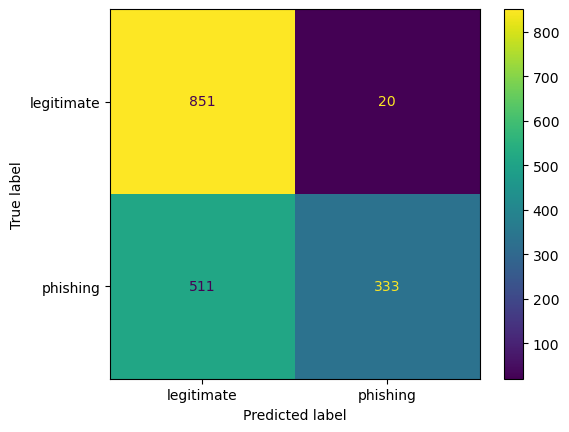

In [66]:
cm = confusion_matrix(y_test, pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
display_cm.plot()
plt.show()

In [67]:
print(f'Accuracy: {round(accuracy_score(y_test, pred)*100, 4)}%')
end = time.time()
finalTime = end - start
print("Total time (in seconds): " + str(finalTime))


Accuracy: 69.0379%
Total time (in seconds): 91.15371656417847


In [70]:
import os
import joblib


home_dir = os.path.expanduser('~')
models_dir = os.path.join(home_dir, 'models')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

filename = os.path.join(models_dir, 'saved_model_87.sav')

